                                                                         ET3112- Image Processing  
                                                                      Assignment 2 - Spatial Filtering 

Name - K.V.Wickramanayake   
Index No - D/ENG/21/0073/EE  
GitHub link - https://github.com/KisajaW/Assignment2.git




Question 01   

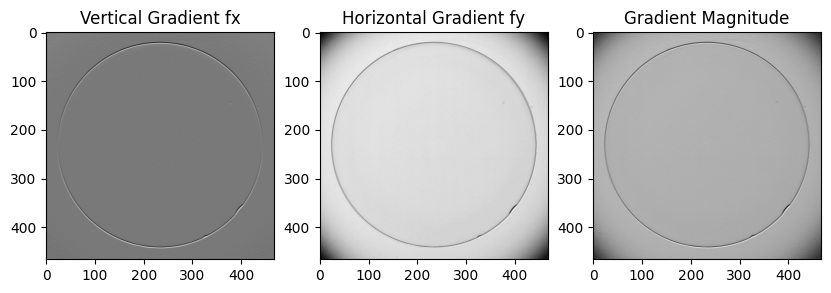

Center Coordinates : ( 233 , 231 )


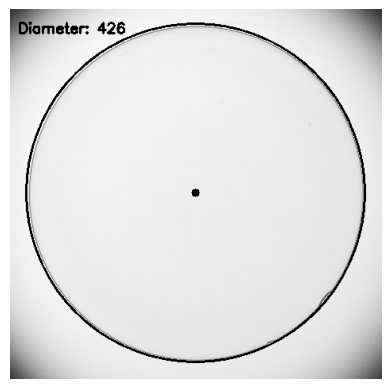

In [122]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('contact_lens.tif', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None

# vertical gradient fx using the Sobel kernel
sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], np.float32)
img_x = cv.filter2D(img.astype('float'), -1,sobel_v)
img_x = cv.normalize(img_x.astype('float'), None, 0, 255.0, cv.NORM_MINMAX)

# horizontal gradient fy using the Sobel kernel
sobel_h = np.array([[-1,0,1],[0,0,0],[1,2,1]], np.float32)
img_y = cv.filter2D(img.astype('float'),-1, sobel_h)
img_y = cv.normalize(img_y.astype('float'),None,0,255.0,cv.NORM_MINMAX)

# Gradient magnitude |fx|+|fy|
img1= cv.addWeighted(np.absolute(img_x),1,np.absolute(img_y),1,0)

#Plotting the results
fg,ax = plt.subplots(1,3,figsize = (10,5))
ax[0].imshow(img_x, cmap='gray')
ax[0].set_title("Vertical Gradient fx")
ax[1].imshow(img_y, cmap='gray')
ax[1].set_title("Horizontal Gradient fy")
ax[2].imshow(img1, cmap='gray')
ax[2].set_title("Gradient Magnitude")
plt.show()

# Applying Gaussian blur to reduce noise 
blur = cv.GaussianBlur(img, (5, 5), 0)
# Applying Canny edge detection to detect the edges of the circular object
edges = cv.Canny(blur, 50, 150)
# Finding the coordinates of the non-zero pixels in the edge image
y_coords, x_coords = np.where(edges != 0)
# Finding the center of the circular object as the mean of the pixel coordinates
cX = int(np.mean(x_coords))
cY = int(np.mean(y_coords))
print("Center Coordinates :", "(",cX, "," ,cY,")")
# Calculating the distances of each edge pixel to the center
distances = np.sqrt((x_coords - cX)**2 + (y_coords - cY)**2)
# Calculating the diameter of the circular object as twice the maximum distance
diameter = int(2 * np.max(distances))
# Drawing the center and diameter on the original image
cv.circle(img, (cX, cY), 5, (0, 0, 255), -1)
cv.circle(img, (cX, cY), diameter // 2, (0, 255, 0), 2)
cv.putText(img, f"Diameter: {diameter}", (10, 30), cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
#Result
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



Question 02

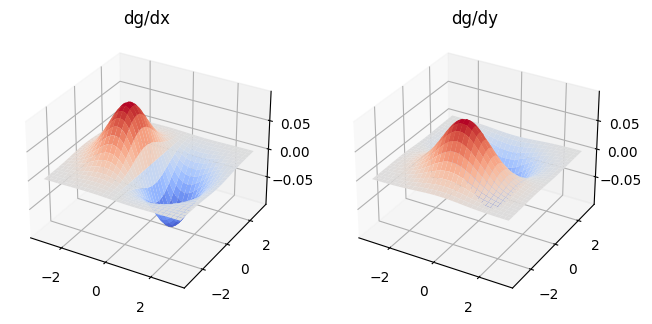

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#Defining the variable regions
y, x = np.arange(-3, 3.1, 0.1), np.arange(-3, 3.1, 0.1)
Y, X = np.meshgrid(x,y)
Z=np.zeros_like(X)
sigma = 1.
#3D Gaussian Kernel
g = 1.0 / (2.0 * np.pi * sigma**2) * np.exp(-(X**2 + Y**2 + Z**2) / (2.0 * sigma**2))

#Derivatives of 3D Gaussian Kernel
g_x = (-X/sigma**2)*g
g_y = (-Y/sigma**2)*g

#Plotting the Kernals
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131, projection = '3d')
ax1.set_title("dg/dx")
ax1.plot_surface(X,Y,g_x, cmap='coolwarm')
ax2 = fig.add_subplot(132, projection = '3d')
ax2.set_title("dg/dy")
ax2.plot_surface(X,Y,g_y, cmap='coolwarm')
plt.show()






Question 03

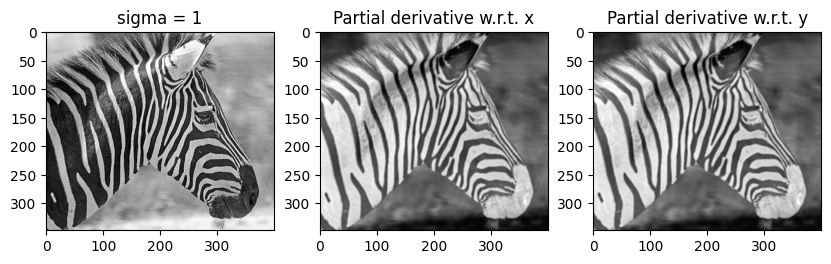

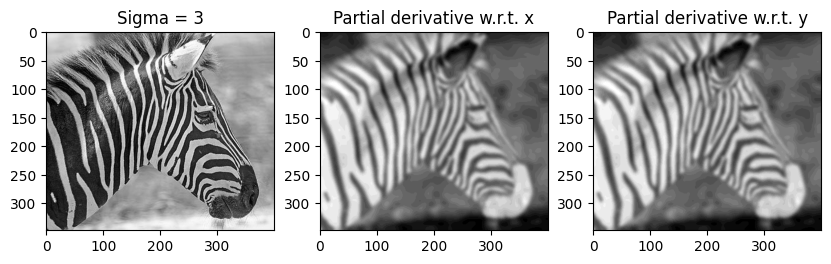

In [1]:
import numpy as np
import cv2 as cv
from scipy import ndimage
import matplotlib.pyplot as plt

img = cv.imread('zebrahead.jpg', cv.IMREAD_GRAYSCALE)

sigma = 1
#Gaussian kernel and its derivatives
g = np.zeros((5*sigma, 5*sigma))
for i in range(5*sigma):
    for j in range(5*sigma):
        x = i - 2*sigma
        y = j - 2*sigma
        g[i, j] = 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))
g_x = ndimage.convolve(img, -g/sigma**2)
g_y = ndimage.convolve(img, -g.T/sigma**2)

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('sigma = 1')
axs[1].imshow(g_x, cmap='gray')
axs[1].set_title('Partial derivative w.r.t. x')
axs[2].imshow(g_y, cmap='gray')
axs[2].set_title('Partial derivative w.r.t. y')
plt.show()

sigma = 3

#Gaussian kernel and its derivatives
g = np.zeros((5*sigma, 5*sigma))
for i in range(5*sigma):
    for j in range(5*sigma):
        x = i - 2*sigma
        y = j - 2*sigma
        g[i, j] = 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))
g_x = ndimage.convolve(img, -g/sigma**2)
g_y = ndimage.convolve(img, -g.T/sigma**2)

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Sigma = 3')
axs[1].imshow(g_x, cmap='gray')
axs[1].set_title('Partial derivative w.r.t. x')
axs[2].imshow(g_y, cmap='gray')
axs[2].set_title('Partial derivative w.r.t. y')
plt.show()

Question 04

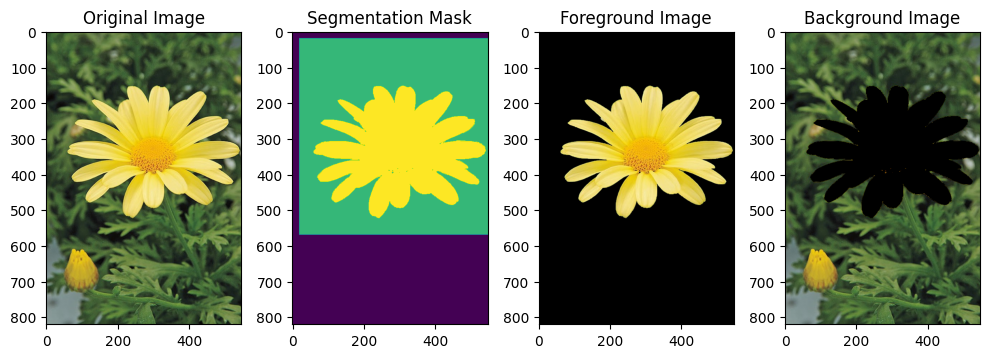

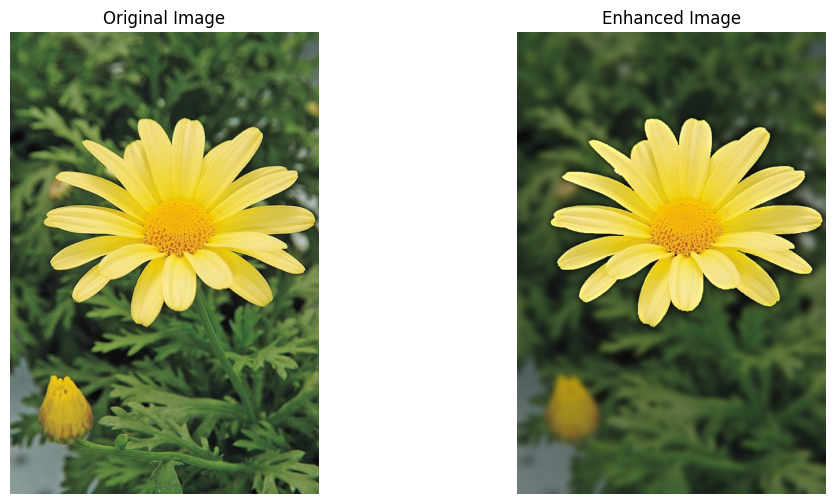

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Loading the image
img = cv.imread('daisy.jpg')

# Creating a mask with same dimensions as image, and setting everything to background
mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)
# Defining the rectangle enclosing the flower
rect = (20, 20, 550, 550)
# Runing the grabCut algorithm
cv.grabCut(img, mask, rect, background, None, 5, cv.GC_INIT_WITH_RECT)
# Creating a new mask with the foreground pixels set to 1, and the background pixels set to 0
new_mask = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')
# Applying the mask to the original image to get the foreground and background images
foreground = cv.bitwise_and(img, img, mask=new_mask)
background = cv.bitwise_and(img, img, mask=1 - new_mask)

plt.figure(figsize=(10,10))
# Displaying the Original Image
plt.subplot(1,4,1)
plt.imshow(img[:,:,::-1])
plt.title('Original Image')
# Displaying the Final Segmentation Mask
plt.subplot(1,4,2)
plt.imshow(mask)
plt.title('Segmentation Mask')
# Displaying the Foreground Image
plt.subplot(1,4,3)
plt.imshow(foreground[:,:,::-1])
plt.title('Foreground Image')
# Displaying the Background Image
plt.subplot(1,4,4)
plt.imshow(background[:,:,::-1])
plt.title('Background Image')
plt.tight_layout()
plt.show()

# Applying Gaussian blur to the background image
blurred_bg = cv.GaussianBlur(background, (31, 31), 0)
# Combining the foreground image and blurred background image
enhanced_img = cv.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

plt.figure(figsize=(12,6))
# Displaying the original image  
plt.subplot(1, 2, 1)
plt.imshow(img[:,:,::-1])
plt.title('Original Image')
plt.axis('off')
# Displaying enhanced image  
plt.subplot(1, 2, 2)
plt.imshow(enhanced_img[:,:,::-1])
plt.title('Enhanced Image')
plt.axis('off')

plt.show()


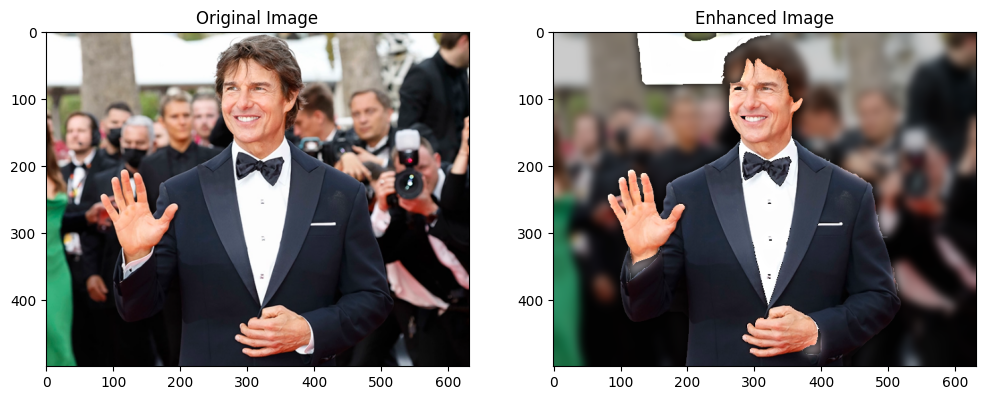

In [120]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

#Loding the image
img = cv.imread('Tom.png')

# Creating a mask with same dimensions as image, and setting everything to background
mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)
# Defining the rectangle enclosing the flower
rect = (80, 0, 450, 500)
# Runing the grabCut algorithm
cv.grabCut(img, mask, rect, background, None, 5, cv.GC_INIT_WITH_RECT)
# Creating a new mask with the foreground pixels set to 1, and the background pixels set to 0
new_mask = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')
# Applying the mask to the original image to get the foreground and background images
foreground = cv.bitwise_and(img, img, mask=new_mask)
background = cv.bitwise_and(img, img, mask=1 - new_mask)
# Applying Gaussian blur to the background image
blurred_bg = cv.GaussianBlur(background, (41, 41), 0)
# Combining the foreground image and blurred background image
enhanced_img = cv.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

plt.figure(figsize=(12,6))
# Displaying the original image  
plt.subplot(1, 2, 1)
plt.imshow(img[:,:,::-1])
plt.title('Original Image')
# Displaying enhanced image  
plt.subplot(1, 2, 2)
plt.imshow(enhanced_img[:,:,::-1])
plt.title('Enhanced Image')

plt.show()

